In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# load cleaned dataset 

df = pd.read_csv(r"C:\Users\Caster Zhang\Downloads\clean_data_1.csv")

In [8]:
# Filter data for StockCode '85123A'
product_df = df[df['StockCode'] == '85123A']

# Convert InvoiceDate to datetime type
product_df['InvoiceDate'] = pd.to_datetime(product_df['InvoiceDate'])

# Set InvoiceDate as index
product_df = product_df.set_index('InvoiceDate')

# Resample by week and sum the Quantity
weekly_quantity = product_df['Quantity'].resample('W').sum()


C:\Users\Caster Zhang\AppData\Local\Temp\ipykernel_28072\1170834481.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  product_df['InvoiceDate'] = pd.to_datetime(product_df['InvoiceDate'])
C:\Users\Caster Zhang\AppData\Local\Temp\ipykernel_28072\1170834481.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['InvoiceDate'] = pd.to_datetime(product_df['InvoiceDate'])


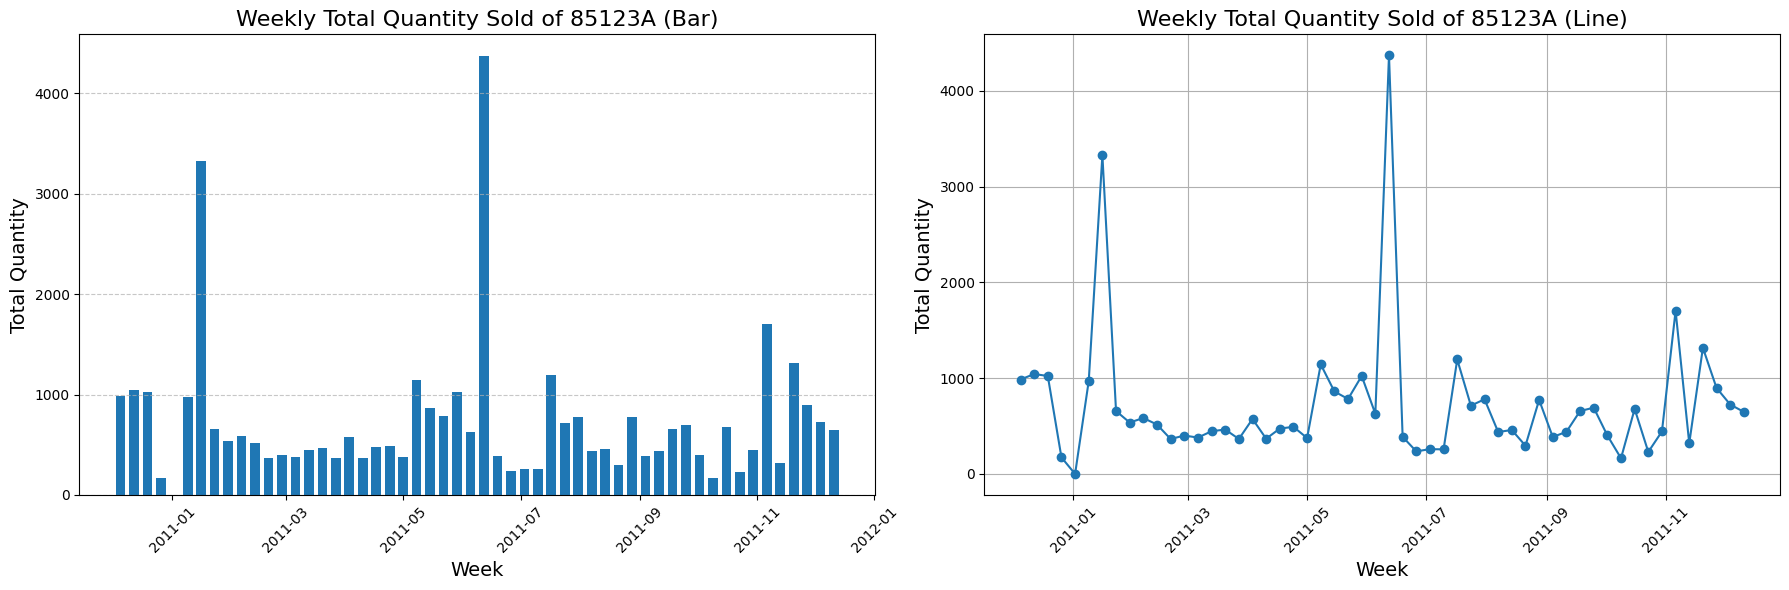

In [12]:

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Bar Plot on the Left ---
axes[0].bar(weekly_quantity.index, weekly_quantity.values, width=5, align='center')
axes[0].set_title('Weekly Total Quantity Sold of 85123A (Bar)', fontsize=16)
axes[0].set_xlabel('Week', fontsize=14)
axes[0].set_ylabel('Total Quantity', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- Line Plot on the Right ---
axes[1].plot(weekly_quantity.index, weekly_quantity.values, marker='o')
axes[1].set_title('Weekly Total Quantity Sold of 85123A (Line)', fontsize=16)
axes[1].set_xlabel('Week', fontsize=14)
axes[1].set_ylabel('Total Quantity', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\Caster Zhang\AppData\Local\Temp\ipykernel_28072\3352413894.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  product_df['InvoiceDate'] = pd.to_datetime(product_df['InvoiceDate'])
C:\Users\Caster Zhang\AppData\Local\Temp\ipykernel_28072\3352413894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['InvoiceDate'] = pd.to_datetime(product_df['InvoiceDate'])
C:\Users\Caster Zhang\AppData\Local\Temp\ipykernel_28072\3352413894.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

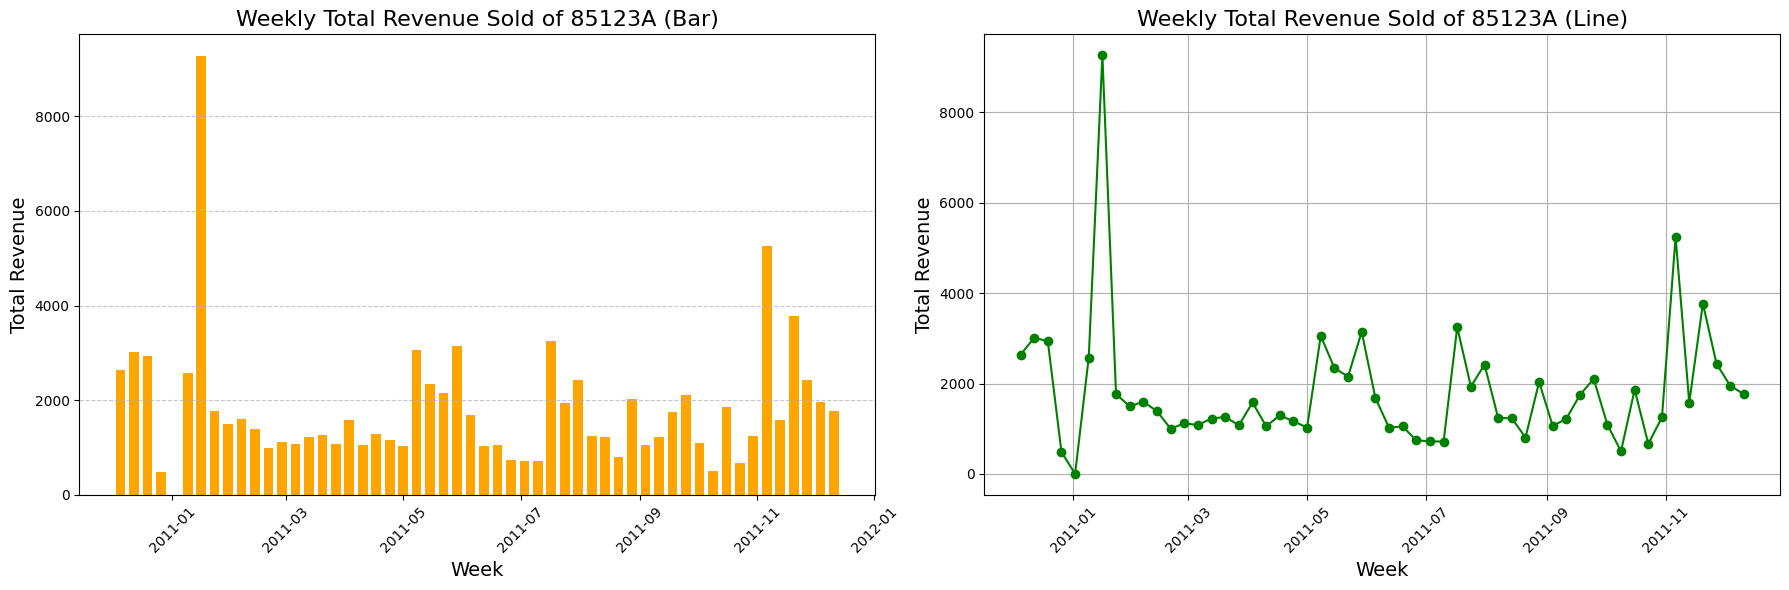

In [14]:
product_df = df[df['StockCode'] == '85123A']

# Convert InvoiceDate to datetime
product_df['InvoiceDate'] = pd.to_datetime(product_df['InvoiceDate'])


product_df['Revenue'] = product_df['Quantity'] * product_df['UnitPrice']

# Set InvoiceDate as index
product_df = product_df.set_index('InvoiceDate')

# Resample by week and sum Revenue
weekly_revenue = product_df['Revenue'].resample('W').sum()

# --- Create Subplots ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Bar Plot of Weekly Revenue ---
axes[0].bar(weekly_revenue.index, weekly_revenue.values, width=5, align='center', color='orange')
axes[0].set_title('Weekly Total Revenue Sold of 85123A (Bar)', fontsize=16)
axes[0].set_xlabel('Week', fontsize=14)
axes[0].set_ylabel('Total Revenue', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- Line Plot of Weekly Revenue ---
axes[1].plot(weekly_revenue.index, weekly_revenue.values, marker='o', color='green')
axes[1].set_title('Weekly Total Revenue Sold of 85123A (Line)', fontsize=16)
axes[1].set_xlabel('Week', fontsize=14)
axes[1].set_ylabel('Total Revenue', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
product_df = df[df['StockCode'] == '85123A']

# Convert InvoiceDate to datetime
product_df['InvoiceDate'] = pd.to_datetime(product_df['InvoiceDate'])

# Calculate Revenue
product_df['Revenue'] = product_df['Quantity'] * product_df['UnitPrice']

# Set InvoiceDate as index
product_df = product_df.set_index('InvoiceDate')

# Resample by Month
monthly_quantity = product_df['Quantity'].resample('M').sum()
monthly_revenue = product_df['Revenue'].resample('M').sum()

# Find Top 3 months by Quantity
top3_quantity_months = monthly_quantity.sort_values(ascending=False).head(3)

# Find Top 3 months by Revenue
top3_revenue_months = monthly_revenue.sort_values(ascending=False).head(3)

# Display the results
print("Top 3 Months by Total Quantity Sold:")
print(top3_quantity_months)

print("\nTop 3 Months by Total Revenue Earned:")
print(top3_revenue_months)

Top 3 Months by Total Quantity Sold:
InvoiceDate
2011-06-30    5657
2011-01-31    5522
2011-11-30    4648
Name: Quantity, dtype: int64

Top 3 Months by Total Revenue Earned:
InvoiceDate
2011-01-31    15191.96
2011-11-30    14119.80
2011-05-31    11172.17
Name: Revenue, dtype: float64


C:\Users\Caster Zhang\AppData\Local\Temp\ipykernel_28072\2534623724.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  product_df['InvoiceDate'] = pd.to_datetime(product_df['InvoiceDate'])
C:\Users\Caster Zhang\AppData\Local\Temp\ipykernel_28072\2534623724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['InvoiceDate'] = pd.to_datetime(product_df['InvoiceDate'])
C:\Users\Caster Zhang\AppData\Local\Temp\ipykernel_28072\2534623724.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea